# Data Science SE

## Juan Sirai

<img src = 'https://ce8dc832c.cloudimg.io/cdn/n/n@03ab4e7ed94d8c6b798ac13091cc7ea54b1c7835/_cs_/2020/05/5eb42c5cba088/schneider_electric_logo.png'>

In [389]:
import pandas as pd
import requests
import json
import PyPDF2
import re
import numpy as np
from os import listdir
from os.path import isfile, join
import glob

# Librerias para graficar
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Modelado
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# 1) Data Creation

En esta sección, procederemos a procesar cada uno de los diferentes tipos de datasets, a fin de dejarlos en condiciones de mergear

-------------------------------------------------------------------
## 📝 CSV

In [390]:
# Importamos los csv
data_train_1 = pd.read_csv('data/train/train1.csv',sep=',')
data_train_2 = pd.read_csv('data/train/train2.csv', sep=';')

In [391]:
nombre_columnas = train_1.columns
nombre_columnas

Index(['countryName', 'eprtrSectorName', 'EPRTRAnnexIMainActivityLabel',
       'FacilityInspireID', 'facilityName', 'City', 'targetRelease',
       'pollutant', 'reportingYear', 'MONTH', 'DAY', 'CONTINENT',
       'max_wind_speed', 'avg_wind_speed', 'min_wind_speed', 'max_temp',
       'avg_temp', 'min_temp', 'DAY WITH FOGS', 'REPORTER NAME', 'CITY ID'],
      dtype='object')

In [392]:
columnas_enteras = ['reportingYear','MONTH','DAY','DAY WITH FOGS']
columnas_decimales = ['max_wind_speed','avg_wind_speed',
                    'min_wind_speed','max_temp','avg_temp','min_temp']

-------------------------------------------------------------------
## 📝 Json

 Importamos los json:
 
 For train3:

 http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/first

 For train4:

 http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/second

 For train5:

 http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/third

In [393]:
url1 = 'http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/first'
url2 = 'http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/second'
url3 = 'http://schneiderapihack-env.eba-3ais9akk.us-east-2.elasticbeanstalk.com/third'

In [394]:
def get_df_from_request(url):
    """
    Funcion que recibe un endpoint, y devuelve un dataframe con las columnas de nuestra base csv
    """
    response = requests.get(url)
    txt = response.text
    dataframe = pd.read_json(txt, orient = 'records')
    # reordenamos columnas para que sea igual que los csv
    df = dataframe.reindex(columns=nombre_columnas)
    ## Opcional vemos que columnas tenemos en el json que no teníamos en el csv
    columnas_json = df.columns
    for col in dataframe.columns:
        encontre=False
        columna = 0
        while not encontre and columna < len(columnas_json):
            if col == columnas_json[columna]:
                encontre = True
            else:
                columna+=1
        if not encontre:
            print(f"Esta columna no la pudimos incluir: {col}")
    return df

In [395]:

print('Creamos dataset 3: ')
data_train_3 = get_df_from_request(url1)
print('Creamos dataset 4: ')
data_train_4 = get_df_from_request(url2)
print('Creamos dataset 5: ')
data_train_5 = get_df_from_request(url3)


Creamos dataset 3: 
Esta columna no la pudimos incluir: 
Esta columna no la pudimos incluir: EPRTRAnnexIMainActivityCode
Esta columna no la pudimos incluir: EPRTRSectorCode
Creamos dataset 4: 
Esta columna no la pudimos incluir: 
Esta columna no la pudimos incluir: EPRTRAnnexIMainActivityCode
Esta columna no la pudimos incluir: EPRTRSectorCode
Creamos dataset 5: 
Esta columna no la pudimos incluir: 
Esta columna no la pudimos incluir: EPRTRAnnexIMainActivityCode
Esta columna no la pudimos incluir: EPRTRSectorCode


-------------------------------------------------------------------
## 📝 PDF

Veamos un caso de ejemplo de cómo está estructurado el pdf, para posteriormente almacenar dicha información en columnas

In [396]:
with open('data/train/train6/pdfs81596.pdf', 'rb') as pdf:
    # creating a pdf reader object 
    pdfReader = PyPDF2.PdfFileReader(pdf) 
    # creating a page object 
    pageObj = pdfReader.getPage(0) 
    # extracting text from page 
    texto =pageObj.extractText() 
    linea = ''
    lista = []
    for t in texto:
        if t != "\n":
            if t != " ":
                linea+=t
        else:
            lista.append(linea)
            linea = ''
    # Imprimimos para ver la posicion de cada elemento
    i = 0
    for linea in lista:
        print(f'{i} - {linea}')
        i+=1

0 - REPORTCONTAMINACIÓN
1 - nº:
2 - 81596
3 - FACILITYNAME:
4 - MillerhillRecycling&EnergyRecoveryCentre
5 - 81597
6 - FacilityInspireID:
7 - UK.SEPA/200002651.Facility
8 - COUNTRY:
9 - UnitedKingdom
10 - CONTINENT:
11 - EUROPE
12 - CITY:
13 - Millerhill,Dalkeith
14 - EPRTRSectorCode:
15 - 5
16 - eprtrSectorName:
17 - Wasteandwastewatermanagement
18 - MainActivityCode:
19 - 5(b)
20 - targetRealase:
21 - AIR
22 - pollutant:
23 - Carbondioxide(CO2)
24 - emissions:
25 - 1,32E+08
26 - DAY:
27 - 4
28 - MONTH:
29 - 12
30 - YEAR:
31 - 2019
32 - METEOROLOGICALCONDITIONS
33 - max_wind_speed:
34 - 2,09E+15
35 - min_wind_speed:
36 - 2,46E+16
37 - avg_wind_speed:
38 - 2,07E+15
39 - max_temp:
40 - 5,74E+15
41 - min_temp:
42 - 9,42E+15
43 - avg_temp:
44 - 7,31E+15
45 - DAYSFOG:
46 - 6
47 - REPORTERNAME:
48 - JasonMoses
49 - CITY_ID
50 - c662b4b4d859a9c224b5ac0acf221748


Podemos observar que tenemos los campos serparados mayoritariamente por saltos de linea, con lo cual podemos aprovechar dicha condición parar generar un dataframe solamente con las lineas que nos interese.
Lo que haremos en primera instancia será almacenar cada linea del la pagina en una posición de una lista (solo a efectos de poder acceder a ella de manera indexada), y luego sabiendo en qué posición está el resultado deseado, lo guardaremos en nuestras respectivas columnas del dataframe.

ATENCION: es una solución que dista de ser óptima para la generalidad de los casos, ya que parte del supuesto que todos los PDF estarán organizados de la misma manera. 
Sin embargo se opta por esta alternativa, dado el tiempo disponible y que el impacto que puede llegar a causar un error en una de estas filas es muy bajo (1% del train)


De lo antedicho, vemos que:
* 'countryName': 9
* 'eprtrSectorName': 17
* 'EPRTRAnnexIMainActivityLabel': 19
* 'FacilityInspireID': 7
* 'facilityName': 4
* 'City': 13
* 'targetRelease': 21
* 'pollutant': 23
* 'reportingYear': 31
* 'MONTH': 29
* 'DAY': 27
* 'CONTINENT': 11
* 'max_wind_speed': 34
* 'avg_wind_speed': 38
* 'min_wind_speed':  36
* 'max_temp': 40
* 'avg_temp': 44
* 'min_temp': 42
* 'DAY WITH FOGS': 46
* 'REPORTER NAME': 48
* 'CITY ID': 50


Podemos entonces crear un diccionario con los nombres de las columnas y sus respectivos indices, para utilizarlos luego en la generacion de cada fila del dataframe

In [397]:
diccionario  = {
    'countryName': 9,
    'eprtrSectorName': 17, 
    'EPRTRAnnexIMainActivityLabel': 19,
    'FacilityInspireID': 7,
    'facilityName': 4,
    'City': 13,
    'targetRelease': 21,
    'pollutant': 23,
    'reportingYear': 31,
    'MONTH': 29,
    'DAY': 27,
    'CONTINENT': 11,
    'max_wind_speed': 34,
    'avg_wind_speed': 38,
    'min_wind_speed':  36,
    'max_temp': 40,
    'avg_temp':44,
    'min_temp': 42,
    'DAY WITH FOGS': 46,
    'REPORTER NAME': 48,
    'CITY ID': 50
   }

In [398]:

def convertidor_pdf(mypath):

    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    data = []
    for file in onlyfiles:
    
    # Generamos una fila de nuestro dataset a partir de un archivo pdf
    
        with open(f'{mypath}{file}', 'rb') as pdf:
            # creating a pdf reader object 
            pdfReader = PyPDF2.PdfFileReader(pdf) 
            # creating a page object 
            pageObj = pdfReader.getPage(0) 
            # extracting text from page 
            texto =pageObj.extractText() 
            linea = ''
            lista = []
            for t in texto:
                if t != "\n":
                    if t != " ":
                        linea+=t
                else:
                    lista.append(linea)
                    linea = ''
        
   
        row = []
        try:
            for col in nombre_columnas:
                elemento = lista[diccionario[col]]
                if col in columnas_decimales:
                    exponente = elemento.partition('+')[2]       # me quedo con el exponente
                    elemento = elemento.replace(',','.')         # Por los numeros almacenados en notacion cientifica
                    if(exponente.isnumeric()):
                        elemento = float(elemento) / (10**int(exponente))        # Me quedo con la notación simplificada
                row.append(elemento)
        except IndexError:
            print('No se pudo procesar el archivo ',file)
        else: 
            data.append(row)
    resultado = pd.DataFrame(data, columns = nombre_columnas)
    
    # Convertimos a los tipo de datos deseados
    for col in resultado.columns:
        if col in columnas_enteras:
            resultado[col] = resultado[col].astype('int64')
        elif col in columnas_decimales:
            resultado[col] = resultado[col].astype(float)
    
    return resultado


## NOTAS 1:

# Si bien con python podemos convertir directamente de notación científica a float, en iteraciones anteriores cuando
# hacía la conversión, noté que los números me quedaban en escalas muy elevadas.
# Revisando como estaban almacenadas las variables en los Txt y en el Json, intuí que para motivos de simplificación
# se quedaban con el numero expresado en sus primeros decimales: Ejemplo en lugar de 2,15E+15 utilizan 2,15

# es por eso que a medida que leemos el archivo, si la columna es numerica nos quedamos con el exponente, para posteriormente
# dividir dicho numero por 10^exp y expresarlo en sus primeros decimales

## NOTAS 2:

# Por cuestiones de escala, si bien en este paso divido al numero por 10 elevado a su exponente para quedarme con la
# parte decimal previa a la notación científica, sigo teniendo diferencias de escala al comparar con las series csv
# y que provienen de la API.

# en efecto, incluso si comparamos los valores de las series csv entre sí no tiene sentido la relación entre las
# columnas max, mean y mid (en muchos casos la columna min era mayor que la mean)

# Por ese motivo, si bien a partir de este punto genero de todas formas el dataset y lo mergeo, en un paso previo al
# analisis estadístico voy a eliminar los outliers, dentro de los cuales se encuentra la mayor parte de los registros
# del pdf.

In [399]:
mypath = "data/train/train6/"
data_train_6 = convertidor_pdf(mypath)

No se pudo procesar el archivo  pdfs81597.pdf


---------------------------------------------------------------------
## Merge of Train Datasets

Vamos a proceder a mergear los 3 datasets en uno solo, si bien previamente nos garantizamos que las columnas estén en el mismo orden y sean del mismo tipo.

In [400]:
display('Shape of data 1: ',data_train_1.shape,
       'Shape of data 2: ',data_train_2.shape,
       'Shape of data 3: ',data_train_3.shape,
       'Shape of data 4: ',data_train_4.shape,
       'Shape of data 5: ',data_train_5.shape,
       'Shape of data 6: ',data_train_6.shape,
       'Total rows: ',data_train_1.shape[0]+data_train_2.shape[0]+
                      data_train_3.shape[0]+data_train_4.shape[0]+
                      data_train_5.shape[0]+data_train_6.shape[0])
        

'Shape of data 1: '

(18563, 21)

'Shape of data 2: '

(18564, 21)

'Shape of data 3: '

(9500, 21)

'Shape of data 4: '

(9500, 21)

'Shape of data 5: '

(9501, 21)

'Shape of data 6: '

(81, 21)

'Total rows: '

65709

In [401]:
frames = [data_train_1, data_train_2, data_train_3, data_train_4, data_train_5, data_train_6]
df_train = pd.concat(frames)
df_train.shape

(65709, 21)

In [402]:
# Como ultimo paso, homogeneizamos la variable target
#---------------------------------------
#pollutant	number
# Nitrogen oxides (NOX)	0
# Carbon dioxide (CO2)	1
# Methane (CH4)	2
#------------------------------
df_train.groupby(['pollutant'])['pollutant'].count()

pollutant
Carbon dioxide (CO2)     22964
Carbondioxide(CO2)          15
Methane (CH4)            16682
Methane(CH4)                47
Nitrogen oxides (NOX)    25982
Nitrogenoxides(NOX)         19
Name: pollutant, dtype: int64

In [403]:
reemplazos = {
    'Carbon dioxide (CO2)': 1, 
    'Nitrogen oxides (NOX)': 0,
    'Methane (CH4)': 2,
    'Carbondioxide(CO2)': 1,
    'Nitrogenoxides(NOX)': 0, 
    'Methane(CH4)': 2
}
df_train['pollutant']=df_train['pollutant'].replace(reemplazos) 
df_train.groupby(['pollutant'])['pollutant'].count()

pollutant
0    26001
1    22979
2    16729
Name: pollutant, dtype: int64

In [404]:
df_train.rename(columns = {'reportingYear':'year','MONTH':'month','DAY':'day'}, inplace=True)
# Generamos una nueva columna de fecha:
df_train['Datetime'] = pd.to_datetime( df_train[['year', 'month', 'day']])

In [405]:
df_train['day_of_week'] = df_train['Datetime'].dt.day_name()

------------------------------------------------------------------------
# 2) Analisis exploratorio
En esta seccion realizaremos un análisis exploratorio sobre el dataset de entrenamiento, a fin de obtener una mejor representación de la distribución de variables, y su relación con el target

In [406]:
# Corroboraremos primero si tenemos que realizar algún trabajo de filling sobre el dataset
df_train.isnull().sum()

countryName                     0
eprtrSectorName                 0
EPRTRAnnexIMainActivityLabel    0
FacilityInspireID               0
facilityName                    0
City                            0
targetRelease                   0
pollutant                       0
year                            0
month                           0
day                             0
CONTINENT                       0
max_wind_speed                  0
avg_wind_speed                  0
min_wind_speed                  0
max_temp                        0
avg_temp                        0
min_temp                        0
DAY WITH FOGS                   0
REPORTER NAME                   0
CITY ID                         0
Datetime                        0
day_of_week                     0
dtype: int64

## 💡 Eliminación de valores atípicos

Debido a algunos problemas de escala en las variables decimales (algunas expresadas en notación científica, que al convertirlas no tenían tanta relación con el resto de las series), vamos a tomarnos unos segundos para limpiar el datasets de posibles outliers, siempre y cuando el número no sea tan significativo como para ameritar otro tratamiento.

In [407]:
def limpiar_outliers(df, columna):
    """
    Elimina los outliers de una columna dada, retornando el dataset sin ellos.
    """
    # Mostramos la distribucion previa a la limpieza
    plt.figure(figsize=(20,5))
    plt.suptitle(f'Distribucion de {columna} antes de cleaning', size=20)
    plt.subplot(1,2,1)
    sns.distplot(df[columna],color='r')
    plt.subplot(1,2,2)
    sns.boxplot(df[columna],color='r')
    plt.show()
    
    percentile25 = df[columna].quantile(0.25)
    percentile75 = df[columna].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print('Upper Limit outliers: ',df[df[columna] > upper_limit].shape[0])
    print('Lower Limit outliers: ',df[df[columna] < lower_limit].shape[0])
    new_df= df.loc[(df[columna] < upper_limit) & (df[columna] > lower_limit)]
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.suptitle(f'Distribucion de {columna} After clean', size=20)
    sns.distplot(new_df[columna],color='g')
    plt.subplot(1,2,2)
    sns.boxplot(new_df[columna],color='g')
    plt.show()
    return new_df

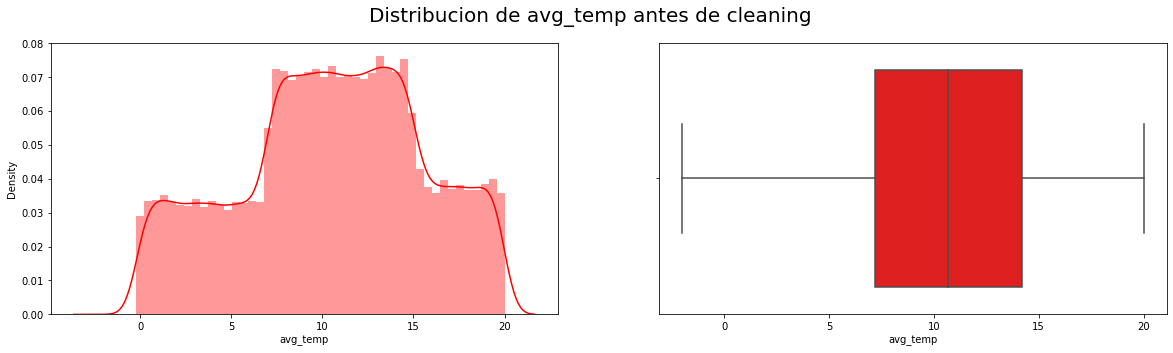

Upper Limit outliers:  0
Lower Limit outliers:  0


In [408]:
clean = limpiar_outliers(df_train, 'avg_temp')

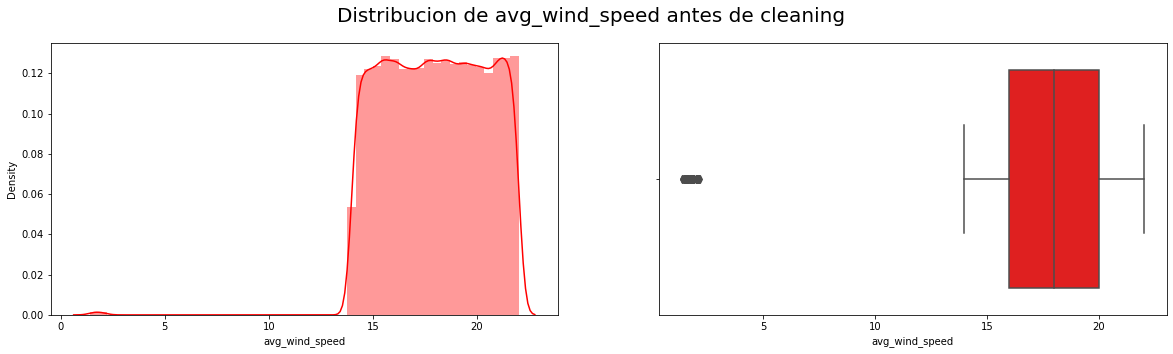

Upper Limit outliers:  0
Lower Limit outliers:  81


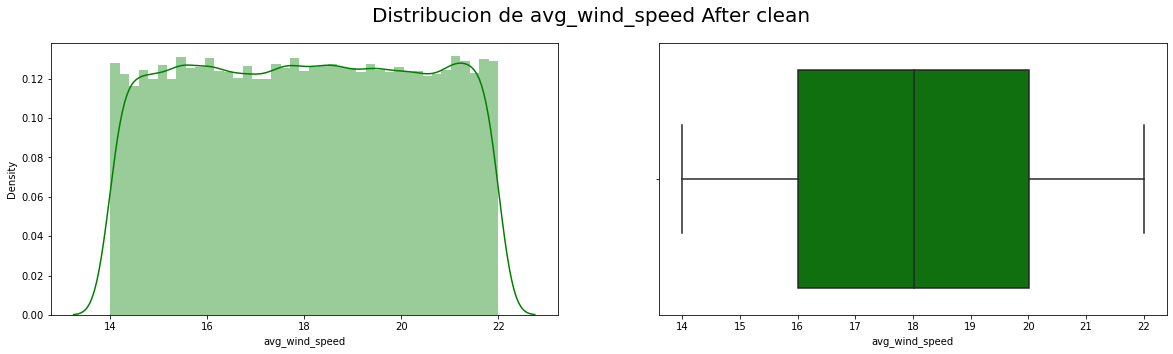

In [409]:
clean = limpiar_outliers(clean, 'avg_wind_speed')

NOTA: 

* Los 81 registros que se eliminan, son casualmente los de la fuente pdf 😒
* En iteraciones anteriores, probé quitando outliers con el mismo método para la variable days with fogs. SI bien la distribución tenía +6000 valores que escapaban al limite superior, consideré que en este caso prefería dejarlos ya que no soy tan conocedor del comportamiento climático en EUR. 

## ☁ Analisis de Variables Climaticas

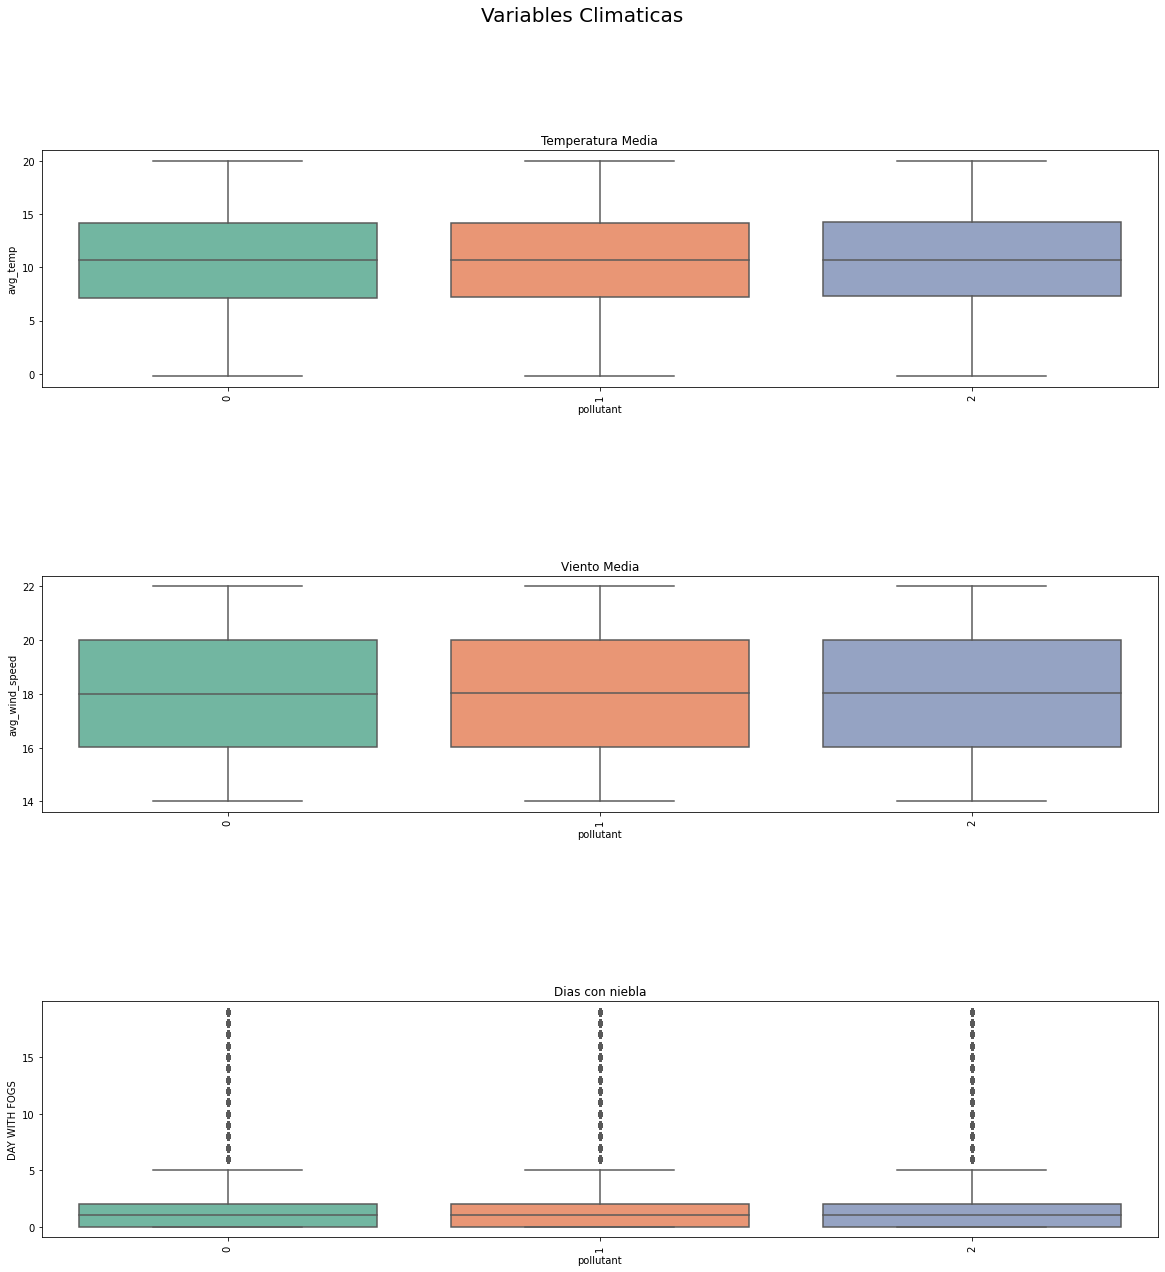

In [410]:
fig = plt.figure(1, figsize=(20,40))
plt.suptitle('Variables Climaticas',fontsize=20)
# set up subplot grid
gridspec.GridSpec(3,2)

# Small subplot
plt.subplot2grid((3,2), (0,0), colspan=2, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Temperatura Media')
plt.xlabel('Gases')
plt.ylabel('Temperatura Media')
sns.boxplot(x='pollutant',data=clean,y ='avg_temp' ,palette='Set2')
plt.xticks(rotation=90)

#Large Plot
plt.subplot2grid((3,2), (1,0), colspan=2, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Viento Media')
plt.xlabel('Gases')
plt.ylabel('Viento Media')
sns.boxplot(x='pollutant',data=clean,y ='avg_wind_speed' ,palette='Set2')
plt.xticks(rotation=90)

plt.subplot2grid((3,2), (2,0), colspan=2, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Dias con niebla')
plt.xlabel('Gases')
plt.ylabel('Dias con niebla')
sns.boxplot(x='pollutant',data=clean,y ='DAY WITH FOGS' ,palette='Set2')
plt.xticks(rotation=90)

#Ajusting plot
fig.set_size_inches(w=20,h=20)
plt.subplots_adjust(hspace=.8)
plt.show()

A priori no se encuentran diferencias significativas en terminos estadisticos para tipos de gases, sin embargo podemos intentar visualizar que ocurre con la distribución de los mismos frente al crecimiento de una variable puntual como puede ser la temperatura o el viento

In [411]:
plt.figure(figsize=(20,5))
plt.title('Temperatura y gases', size=30)
plt.xlabel('Temperatura')
plt.ylabel('Count')
sns.histplot(x='avg_temp',hue='pollutant',data=clean,palette='Set2', multiple='stack')
plt.xticks(rotation=90);

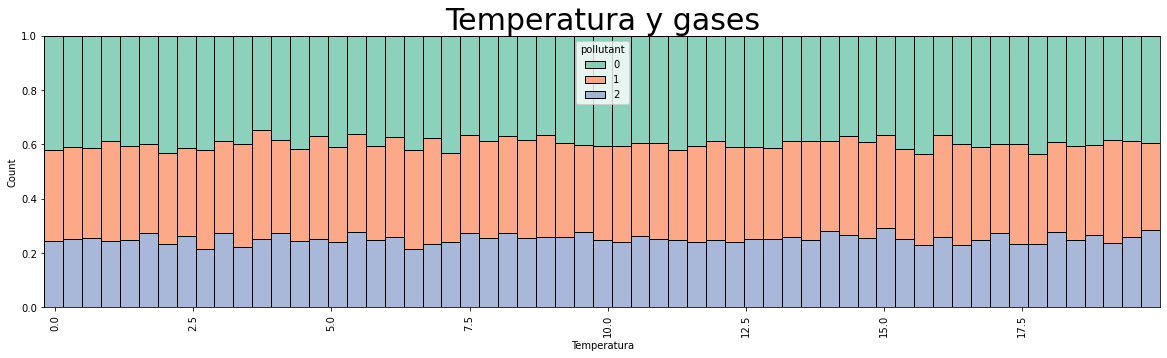

In [412]:
plt.figure(figsize=(20,5))
plt.title('Temperatura y gases', size=30)
plt.xlabel('Temperatura')
plt.ylabel('Count')
sns.histplot(x='avg_temp',hue='pollutant',data=clean,palette='Set2', multiple='fill')
plt.xticks(rotation=90);

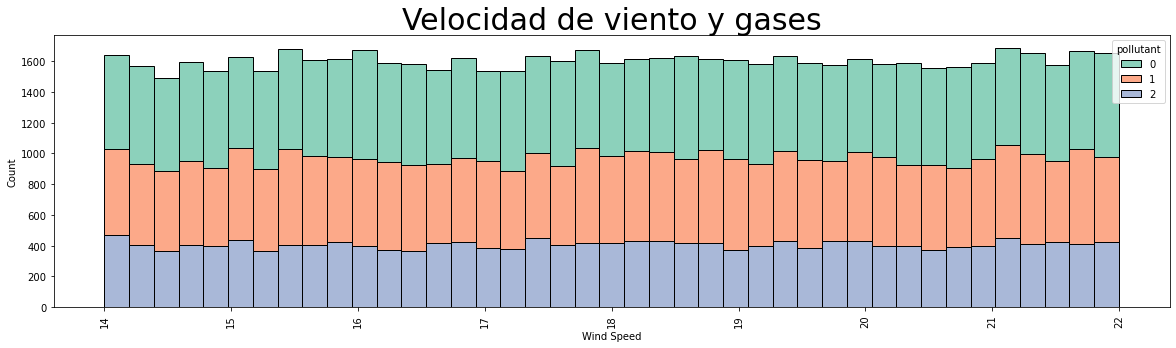

In [413]:
plt.figure(figsize=(20,5))
plt.title('Velocidad de viento y gases', size=30)
plt.xlabel('Wind Speed')
plt.ylabel('Count')
sns.histplot(x='avg_wind_speed',hue='pollutant',data=clean,palette='Set2', multiple='stack')
plt.xticks(rotation=90);

In [414]:
plt.figure(figsize=(20,5))
plt.title('Velocidad de Viento y Gases', size=30)
plt.xlabel('Wind Speed')
plt.ylabel('Count')
sns.histplot(x='avg_wind_speed',hue='pollutant',data=clean,palette='Set2', multiple='fill')
plt.xticks(rotation=90);

## 🌏 Analisis de Variables Geograficas

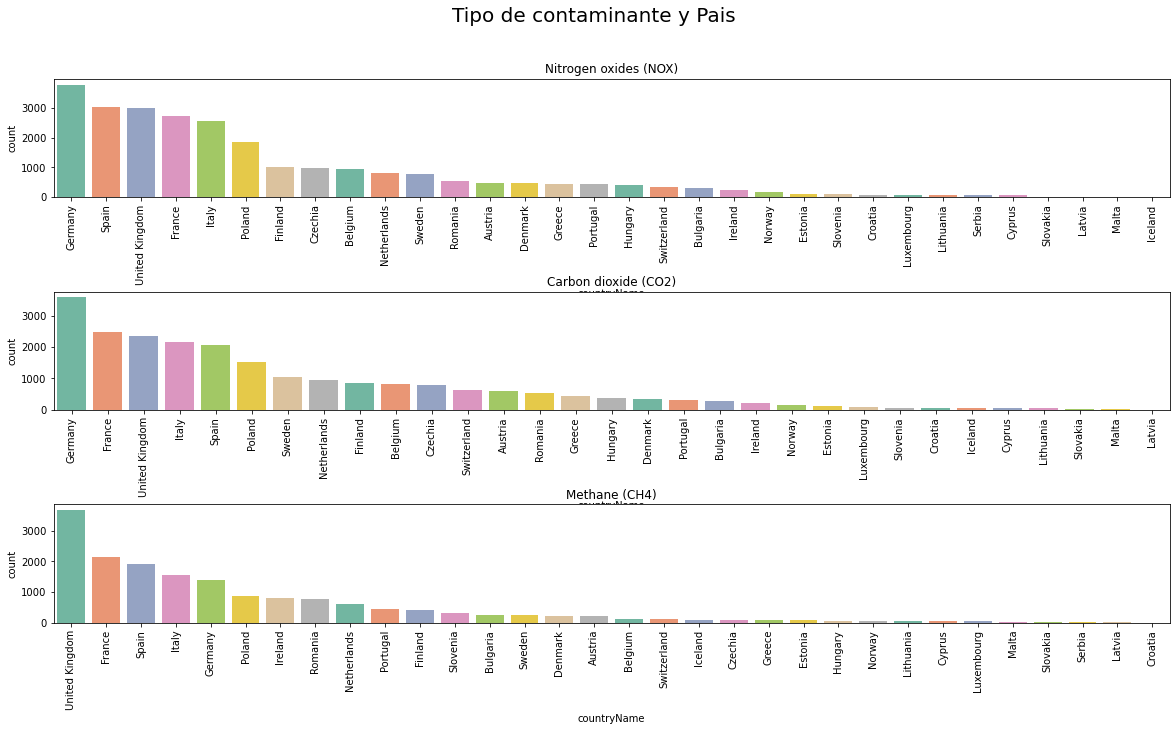

In [415]:
fig = plt.figure(1)
plt.suptitle('Tipo de contaminante y Pais',fontsize=20)
# set up subplot grid
gridspec.GridSpec(3,2)

# Small subplot
plt.subplot2grid((3,2), (0,0), colspan=2, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Nitrogen oxides (NOX)')
plt.xlabel('Country')
plt.ylabel('Observations of NOX')
sns.countplot(x='countryName',data=clean.loc[clean['pollutant']==0],palette='Set2',
             order = clean.loc[clean['pollutant']==0]['countryName'].value_counts().index)
plt.xticks(rotation=90)

#Large Plot
plt.subplot2grid((3,2), (1,0), colspan=2, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Carbon dioxide (CO2)')
plt.xlabel('Country')
plt.ylabel('Observations of CO2')
sns.countplot(x='countryName',data=clean.loc[clean['pollutant']==1],palette='Set2',
             order = clean.loc[clean['pollutant']==1]['countryName'].value_counts().index)
plt.xticks(rotation=90)

plt.subplot2grid((3,2), (2,0), colspan=2, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Methane (CH4)')
plt.xlabel('Country')
plt.ylabel('Observations of CH4')
sns.countplot(x='countryName',data=clean.loc[clean['pollutant']==2],palette='Set2',
             order = clean.loc[clean['pollutant']==2]['countryName'].value_counts().index)
plt.xticks(rotation=90)

#Ajusting plot
fig.set_size_inches(w=20,h=10)
plt.subplots_adjust(hspace=.8)
plt.show()

Como podemos observar, España, Francia y Reino Unido se caracterizan por una mayor concentración de observaciones de todos los gases relevados.

No obstante, cabe destacar que para el gas Metano reino unido obtiene una significable diferencia respecto al resto

In [416]:
plt.figure(figsize=(20,10))
plt.title('Cual es el Gas predominante en cada país?', size=30)
plt.xlabel('Country')
plt.ylabel('Count')
sns.histplot(x='countryName',hue='pollutant',data=clean,palette='Set2', multiple='stack')
plt.xticks(rotation=90);

Aquellos países con menores observaciones totales de gases, poseen mayor presencia de metano que en los grandes generadores (a excepción de Reino Unido).

Una posible explicación podría ser una mayor extensión de actividades agropecuarias por sobre industriales.

## 🌏 Analisis de Tipo de Industria

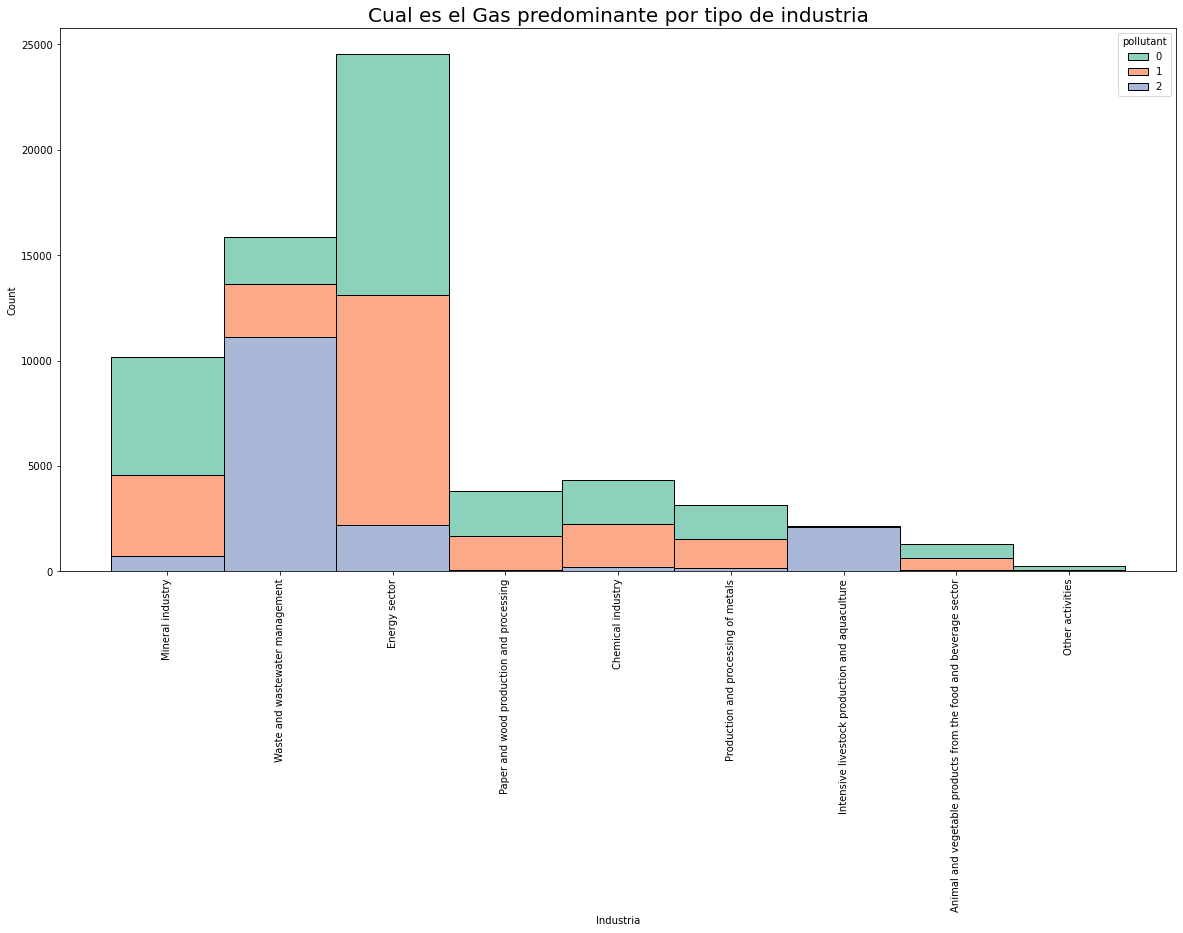

In [417]:
plt.figure(figsize=(20,10))

plt.title('Cual es el Gas predominante por tipo de industria', size=20)
plt.xlabel('Industria')
plt.ylabel('Count')
sns.histplot(x='eprtrSectorName',hue='pollutant',data=clean,palette='Set2', multiple='stack')
plt.xticks(rotation=90);

plt.show()

Una observación interesante, es que el tipo de industria parece tener cierta relación con la presencia de metano, al igual que habíamos pre-observado al analizar por países.

NOTA:
Se realizó previamente el ploteo de tipo de contaminante por actividad principal. Tenemos marcada relación con presencia de contaminantes del estilo de CO2 y COX para actividad de hidrocarburos por sobre el resto. 
El gráfico no se deja, ya que al ser tanta la cantidad de actividades (y cuyos nombres no estan estandarizados), y al estar la actividad principal de cierta forma vinculada a la industria a la que pertenece, optamos por no utilizar dicha variable.

## 🕖 Analisis del Tiempo

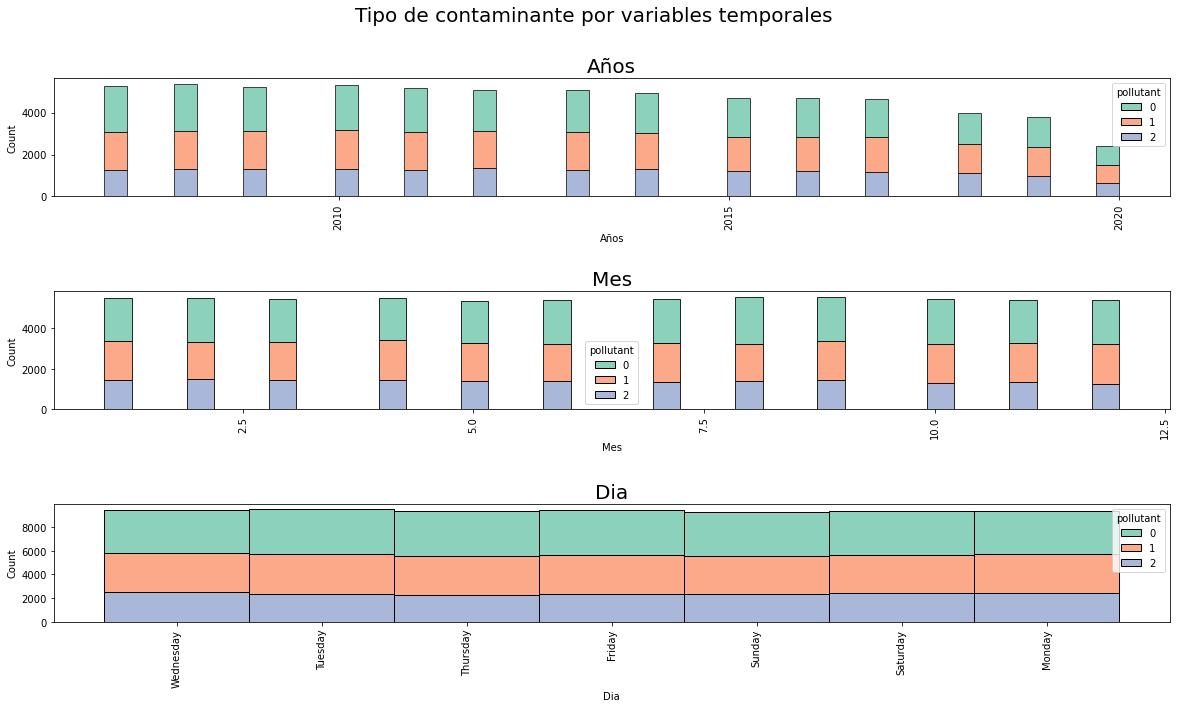

In [418]:
clean = clean.sort_values(by = 'year')

fig = plt.figure(1)
plt.suptitle('Tipo de contaminante por variables temporales',fontsize=20)
# set up subplot grid
gridspec.GridSpec(3,2)

# Small subplot
plt.subplot2grid((3,2), (0,0), colspan=2, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Años', size=20)
plt.xlabel('Años')
plt.ylabel('Count')
sns.histplot(x='year',hue='pollutant',data=clean,palette='Set2', multiple='stack')
plt.xticks(rotation=90);

# Small subplot
plt.subplot2grid((3,2), (1,0), colspan=2, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Mes', size=20)
plt.xlabel('Mes')
plt.ylabel('Count')
sns.histplot(x='month',hue='pollutant',data=clean,palette='Set2', multiple='stack')
plt.xticks(rotation=90);

plt.subplot2grid((3,2), (2,0), colspan=2, rowspan=1)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.title('Dia', size=20)
plt.xlabel('Dia')
plt.ylabel('Count')
sns.histplot(x='day_of_week',hue='pollutant',data=clean,palette='Set2', multiple='stack')
plt.xticks(rotation=90);

#Ajusting plot
fig.set_size_inches(w=20,h=10)
plt.subplots_adjust(hspace=.8)
plt.show()

Del gráfico anterior, vemos como no hay notables diferencias en producción de gases y meses del año, aunque si tenemos el hallazgo de que a partir del año 2018 se obtuvo una notable reducción de la producción de gases en general.

Al contrario de lo que pensaba, no existen notables diferencias para el día de la semana. Eso podría deberse a que las industrias más generadoras de gases, operan de forma continuada.

-----------------------------------------------------------------------------

# Modelado y Prediccion

Si bien podríamos estar mucho más tiempo analizando las variables y su relación con nuestro target, dado el límite temporal que tenemos vamos a proceder a avanzar con el desarrollo de un modelo de clasificación.

Del analisis exploratorio, tomaré la decisión de NO incluir las variables temporales, ya que si bien se nota una marcada reducción de gases a partir de 2018, la proporción de los mismos es similar.

Una variable interesante a incluir es el tipo de industria (muy marcada a la hora de diferenciar participación de tipos de gases).

Si bien me gustaría realizar pruebas incluyendo la variable país, dado el tiempo que queda para finalizar con este análisis voy a optar por no tenerla en consideración, ya que parto de una hipótesis de que la distribución de gases por países podría deberse más al tipo de industria que predomina en dicho país, que al país propiamente dicho

De las variables climaticas, incluiremos temperatura promedio y velocidad del viento.

In [419]:
clean.columns

Index(['countryName', 'eprtrSectorName', 'EPRTRAnnexIMainActivityLabel',
       'FacilityInspireID', 'facilityName', 'City', 'targetRelease',
       'pollutant', 'year', 'month', 'day', 'CONTINENT', 'max_wind_speed',
       'avg_wind_speed', 'min_wind_speed', 'max_temp', 'avg_temp', 'min_temp',
       'DAY WITH FOGS', 'REPORTER NAME', 'CITY ID', 'Datetime', 'day_of_week'],
      dtype='object')

In [420]:
X = clean.drop(columns=['pollutant','countryName','EPRTRAnnexIMainActivityLabel',
                       'FacilityInspireID', 'facilityName', 'City', 'targetRelease',
                       'year', 'month', 'day', 'CONTINENT', 'max_wind_speed',
                       'min_wind_speed', 'max_temp','min_temp','DAY WITH FOGS', 'REPORTER NAME',
                        'CITY ID', 'Datetime', 'day_of_week'])
y = clean.pollutant

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [421]:
y_train.value_counts()

0    20774
1    18427
2    13301
Name: pollutant, dtype: int64

Generaremos muestras aleatorias de la clase minoritaria


In [422]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os, y_train_os=oversampler.fit_resample(X_train,y_train);

print('training set:')
print(y_train_os.value_counts())

training set:
2    20774
0    20774
1    18427
Name: pollutant, dtype: int64


In [423]:
# Generamos nuestras variables Dummies
X_train_os = pd.get_dummies(X_train_os,drop_first=True)


In [432]:
X_train_os.columns

Index(['avg_wind_speed', 'avg_temp', 'eprtrSectorName_Chemical industry',
       'eprtrSectorName_Energy sector',
       'eprtrSectorName_Intensive livestock production and aquaculture',
       'eprtrSectorName_Mineral industry', 'eprtrSectorName_Other activities',
       'eprtrSectorName_Paper and wood production and processing',
       'eprtrSectorName_Production and processing of metals',
       'eprtrSectorName_Waste and wastewater management'],
      dtype='object')

In [431]:
X_test_dummies = pd.get_dummies(X_test)
X_test_dummies.columns

Index(['avg_wind_speed', 'avg_temp',
       'eprtrSectorName_Animal and vegetable products from the food and beverage sector',
       'eprtrSectorName_Chemical industry', 'eprtrSectorName_Energy sector',
       'eprtrSectorName_Intensive livestock production and aquaculture',
       'eprtrSectorName_Mineral industry', 'eprtrSectorName_Other activities',
       'eprtrSectorName_Paper and wood production and processing',
       'eprtrSectorName_Production and processing of metals',
       'eprtrSectorName_Waste and wastewater management'],
      dtype='object')

In [434]:
X_test_dummies = X_test_dummies.drop(columns=['eprtrSectorName_Animal and vegetable products from the food and beverage sector'])

## Random Forest Classifier

In [435]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_os, y_train_os)
pred_rfc = rfc.predict(X_test_dummies)

In [436]:
# Veamos como performa el modelo
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60      5208
           1       0.55      0.52      0.54      4537
           2       0.74      0.79      0.76      3381

    accuracy                           0.62     13126
   macro avg       0.63      0.64      0.63     13126
weighted avg       0.62      0.62      0.62     13126



## Stochastic Gradient Decent Classifier

In [437]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train_os, y_train_os)
pred_sgd = sgd.predict(X_test_dummies)

In [438]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.50      0.89      0.64      5208
           1       0.50      0.00      0.00      4537
           2       0.71      0.79      0.75      3381

    accuracy                           0.56     13126
   macro avg       0.57      0.56      0.46     13126
weighted avg       0.55      0.56      0.45     13126



Vamos a quedarnos con Random Forest, ya que provee un resultado más estable para la predición de todas las clases

-----------------------------------------------------------------

# Prediciendo en datos reales

In [440]:
real = pd.read_csv('data/test_x.csv',sep=',')

In [441]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24480 entries, 0 to 24479
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   test_index                    24480 non-null  int64  
 1   countryName                   24480 non-null  object 
 2   EPRTRSectorCode               24480 non-null  int64  
 3   eprtrSectorName               24480 non-null  object 
 4   EPRTRAnnexIMainActivityCode   24480 non-null  object 
 5   EPRTRAnnexIMainActivityLabel  24480 non-null  object 
 6   FacilityInspireID             24480 non-null  object 
 7   facilityName                  24480 non-null  object 
 8   City                          24480 non-null  object 
 9   targetRelease                 24480 non-null  object 
 10  reportingYear                 24480 non-null  int64  
 11  MONTH                         24480 non-null  int64  
 12  DAY                           24480 non-null  int64  
 13  C

In [443]:
real.isnull().sum()

test_index                      0
countryName                     0
EPRTRSectorCode                 0
eprtrSectorName                 0
EPRTRAnnexIMainActivityCode     0
EPRTRAnnexIMainActivityLabel    0
FacilityInspireID               0
facilityName                    0
City                            0
targetRelease                   0
reportingYear                   0
MONTH                           0
DAY                             0
CONTINENT                       0
max_wind_speed                  0
avg_wind_speed                  0
min_wind_speed                  0
max_temp                        0
avg_temp                        0
min_temp                        0
DAY WITH FOGS                   0
REPORTER NAME                   0
CITY ID                         0
dtype: int64

In [445]:
real_1 = real[['eprtrSectorName','avg_wind_speed','avg_temp']]

In [446]:
# agregamos dummies

real_dummies = pd.get_dummies(real_1)


11

In [447]:
real_dummies = real_dummies.drop(columns=['eprtrSectorName_Animal and vegetable products from the food and beverage sector'])

In [448]:
predicciones = rfc.predict(real_dummies)

In [449]:
data_final = pd.DataFrame(predicciones,columns=['pollutant']).reset_index()

In [451]:
data_final.rename(columns = {'index':'test_index'}, inplace=True)

In [452]:
data_final.to_csv('predictions.csv', index=False)

In [453]:
## convertimos a json

data_final.to_json('predictions.json',orient='index') 


---------------------------------------------------------